# PDA Project Dec 2018 
by Colm Doherty


## 1. Researching an existing dataset

dataset source : Met Eireann https://www.met.ie
monthly rainfall at Dun Laoghaire weather station, 1997-2018
        

In [1]:
# Import pandas etc.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# check versions of all libraries
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.5.final.0
python-bits: 64
OS: Darwin
OS-release: 15.6.0
machine: x86_64
processor: i386
byteorder: little
LC_ALL: None
LANG: en_IE.UTF-8
LOCALE: en_IE.UTF-8

pandas: 0.23.0
pytest: 3.5.1
pip: 10.0.1
setuptools: 39.1.0
Cython: 0.28.2
numpy: 1.14.3
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 6.4.0
sphinx: 1.7.4
patsy: 0.5.0
dateutil: 2.7.3
pytz: 2018.4
blosc: None
bottleneck: 1.2.1
tables: 3.4.3
numexpr: 2.6.5
feather: None
matplotlib: 2.2.2
openpyxl: 2.5.3
xlrd: 1.1.0
xlwt: 1.2.0
xlsxwriter: 1.0.4
lxml: 4.2.1
bs4: 4.6.0
html5lib: 1.0.1
sqlalchemy: 1.2.7
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


In [3]:
! ls


Data_Licence.pdf           MET9223.csv
Data_Licence.txt           PDA Project Dec 2018.ipynb
Hello.py                   PDA project Dec.pdf
Indicator.txt              README.md
LICENSE


In [4]:
# Load the dataset
import csv as df
df = pd.read_csv("MET9223.csv", skiprows=13) 

In [5]:
df

,year,month,rain,gdf,rd,wd
0,1997,8,91.8,17.4,18,16
1,1997,9,11.5,2.9,12,4
2,1997,10,70.7,20.7,14,10
3,1997,11,187.4,54.6,22,17
4,1997,12,84.4,21.7,14,12
5,1998,1,109.4,16.5,19,15
6,1998,2,8.4,2.9,8,4
7,1998,3,61.3,10.3,15,11
8,1998,4,136.5,39,26,16
9,1998,5,27.7,12.5,11,5


In [6]:
df.head()


,year,month,rain,gdf,rd,wd
0,1997,8,91.8,17.4,18,16
1,1997,9,11.5,2.9,12,4
2,1997,10,70.7,20.7,14,10
3,1997,11,187.4,54.6,22,17
4,1997,12,84.4,21.7,14,12


In [7]:
df.tail()


,year,month,rain,gdf,rd,wd
248,2018,4,78.4,12.1,21,16
249,2018,5,20.1,6,10,5
250,2018,6,1.2,1,2,1
251,2018,7,43.5,12.3,9,7
252,2018,8,27.8,11.4,14,10


In [8]:
# what does the data distribution look like?
df.describe()

,year,month,rain
count,253.000000,253.000000,253.000000
mean,2007.624506,6.505929,66.385375
std,6.110532,3.453340,40.455267
min,1997.000000,1.000000,1.200000
25%,2002.000000,4.000000,36.600000
50%,2008.000000,7.000000,57.500000
75%,2013.000000,9.000000,88.300000
max,2018.000000,12.000000,207.000000


In [9]:
# ok, lets ignore the Year & Month columns
df1 = df[['rain','gdf','rd','wd']]
df1.describe()

,rain
count,253.000000
mean,66.385375
std,40.455267
min,1.200000
25%,36.600000
50%,57.500000
75%,88.300000
max,207.000000


notice that only the 'rain' column has a full count of 253 observations. All other variables are missing some data.

In [10]:
# combine Year and Month columns into one timestamp
df.dtypes

year       int64
month      int64
rain     float64
gdf       object
rd        object
wd        object
dtype: object

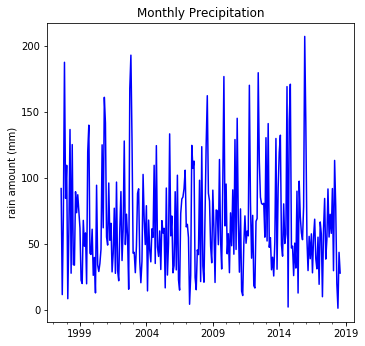

In [26]:
# plot monthly rain data: 
# https://stackoverflow.com/questions/52975561/how-to-combine-month-and-year-columns-of-data-frame-to-form-time-series-data

ax = df.set_index(pd.to_datetime(df[['year','month']].assign(day=1)))['rain']\
       .plot(color='b', figsize=(5.5,5.5), title='Monthly Precipitation')
_ = ax.set_xlabel('')
_ = ax.set_ylabel('rain amount (mm)')           

In [29]:
# plot monthly "greatest daily fall" data: 
# https://stackoverflow.com/questions/52975561/how-to-combine-month-and-year-columns-of-data-frame-to-form-time-series-data

ax = df.set_index(pd.to_datetime(df[['year','month']].assign(day=1)))['gdf']\
       .plot(color='b', figsize=(5.5,5.5), title='"greatest daily fall"')
_ = ax.set_xlabel('')
_ = ax.set_ylabel('greatest daily fall (mm)')  

# this may not plot because of missing data in some cells

TypeError: Empty 'DataFrame': no numeric data to plot